<a href="https://colab.research.google.com/github/nrupu/ML/blob/main/ML0004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df.shape

(375, 6)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [ ]:
df.duplicated().sum()

np.int64(50)

In [ ]:
a=df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


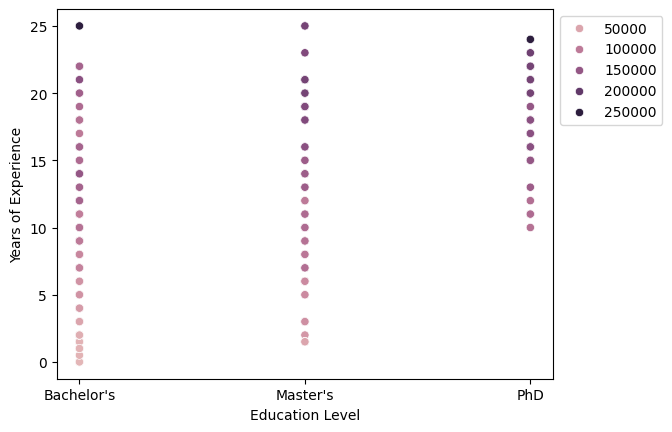

In [ ]:
sns.scatterplot(x='Education Level', y='Years of Experience', data=df, hue='Salary')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

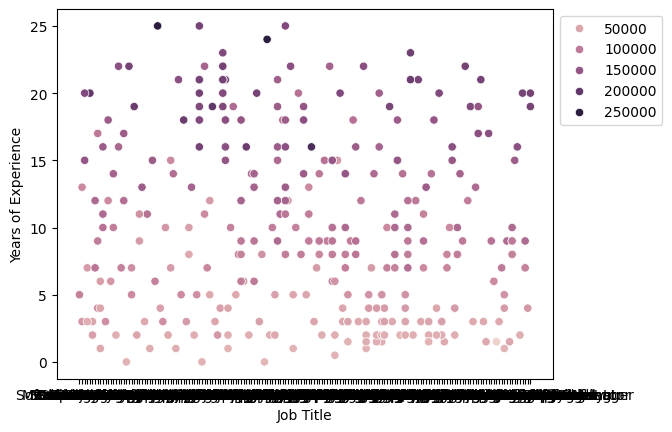

In [ ]:
sns.scatterplot(x='Job Title', y='Years of Experience', data=df, hue='Salary')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

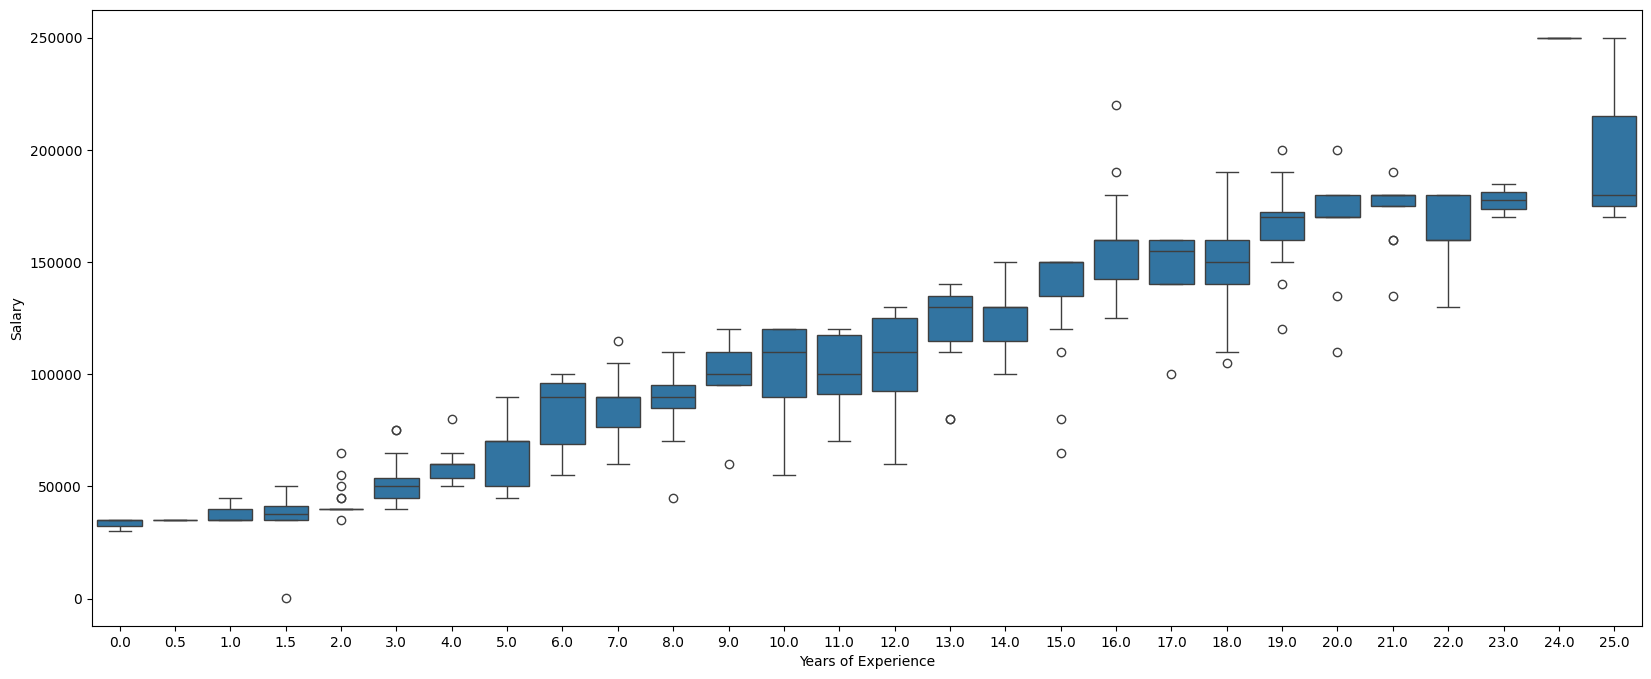

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Years of Experience',y='Salary',data=df)

<Axes: xlabel='Job Title', ylabel='Salary'>

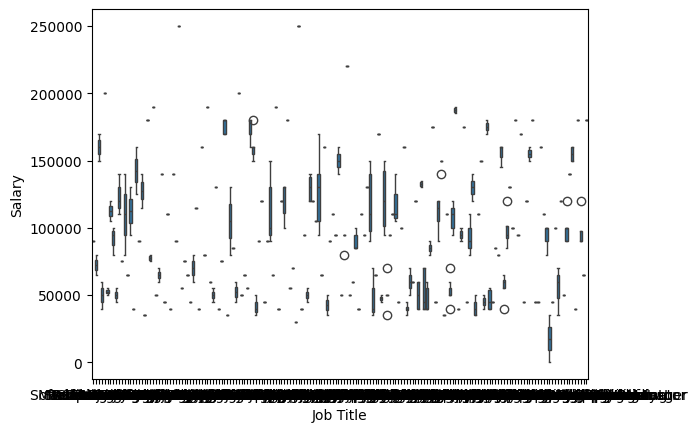

In [ ]:

sns.boxplot(x='Job Title',y='Salary',data=df)

In [ ]:
# Drop multiple columns by providing a list of column names
df.drop(['Age', 'Gender', 'Education Level'], axis=1, inplace=True)

In [ ]:
df

,Job Title,Years of Experience,Salary
0,Software Engineer,5.0,90000.0
1,Data Analyst,3.0,65000.0
2,Senior Manager,15.0,150000.0
3,Sales Associate,7.0,60000.0
4,Director,20.0,200000.0
...,...,...,...
370,Senior Marketing Analyst,8.0,85000.0
371,Director of Operations,19.0,170000.0
372,Junior Project Manager,2.0,40000.0
373,Senior Operations Coordinator,7.0,90000.0


In [ ]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [ ]:
y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
370,85000.0
371,170000.0
372,40000.0
373,90000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Job Title']=le.fit_transform(df['Job Title'])
df

,Job Title,Years of Experience,Salary
0,159,5.0,90000.0
1,17,3.0,65000.0
2,130,15.0,150000.0
3,101,7.0,60000.0
4,22,20.0,200000.0
...,...,...,...
370,131,8.0,85000.0
371,30,19.0,170000.0
372,70,2.0,40000.0
373,137,7.0,90000.0


1)simple regression one input,one output
-linear Regression

2)Mulptiple Regres
more than one input

3)polynominal regression

4)regularized regression-penalty add


In [ ]:
#random forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
RF_pred=RF.predict(X_test)
print(r2_score(RF_pred,y_test))
print('MAE',mean_absolute_error(y_test,RF_pred))
print('MSE',mean_squared_error(y_test,RF_pred))



0.8805472743465075
MAE 9090.990634920638
MSE 243000490.11313868


In [ ]:
plt.scatter(y_test,Li_pred)
plt.plot((y_test.min(),y_test.max()),[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

In [ ]:
#linear regreesion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

Lin_pred=LinReg.predict(X_test)
print(r2_score(Lin_pred,y_test))
print('MAE',mean_absolute_error(y_test,Lin_pred))
print('MSE',mean_squared_error(y_test,Lin_pred))


0.8693880635021669
MAE 10924.628175455211
MSE 218107049.45389754


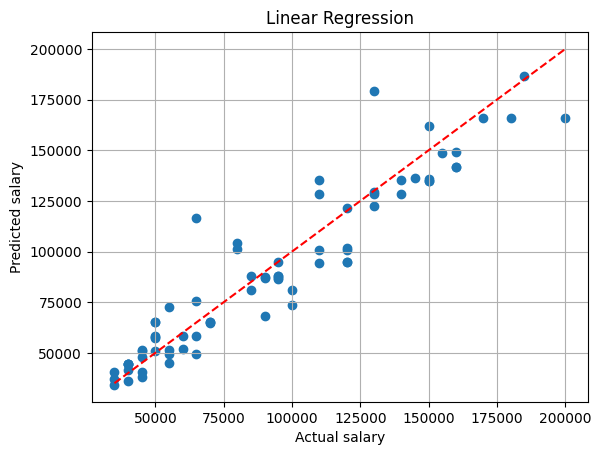

In [ ]:
plt.scatter(y_test,Lin_pred)
plt.plot((y_test.min(),y_test.max()),[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

In [ ]:
#svc regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
svr=SVR()
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)
print(r2_score(svr_pred,y_test))
print('MAE',mean_absolute_error(y_test,svr_pred))
print('MSE',mean_squared_error(y_test,svr_pred))

-2826365.0722030182
MAE 37652.34718112235
MSE 1925761677.3468819


In [ ]:
#decision regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(r2_score(dt_pred,y_test))
print('MAE',mean_absolute_error(y_test,dt_pred))
print('MSE',mean_squared_error(y_test,dt_pred))

0.8133184167142076
MAE 11217.555555555555
MSE 401267559.2592592
